In [1]:
import gdown
import zipfile

# Step 1: Download the zip file from Google Drive
file_id = '1H7OJNxL3fmR1tHqkcUDHRZWq0jhRi-G0'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.zip'

gdown.download(url, output, quiet=False)

# Step 2: Unzip the dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # You can change 'dataset' to any folder name you prefer


Downloading...
From (original): https://drive.google.com/uc?id=1H7OJNxL3fmR1tHqkcUDHRZWq0jhRi-G0
From (redirected): https://drive.google.com/uc?id=1H7OJNxL3fmR1tHqkcUDHRZWq0jhRi-G0&confirm=t&uuid=c808ad07-195f-4e73-bd1c-fb09e2afcd1a
To: C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\dataset.zip
100%|██████████| 76.3M/76.3M [00:07<00:00, 9.68MB/s]


r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset"

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset",            # Replace with your path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.


In [1]:
import os
import hashlib
from PIL import Image
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import random

# --- Set your dataset path ---
dataset_path = r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset"
class_dirs = os.listdir(dataset_path)


# View Sample Images (One per Class)

In [2]:
# Collect image paths and labels
image_paths = []
labels = []

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image_paths.append(img_path)
            labels.append(class_name)

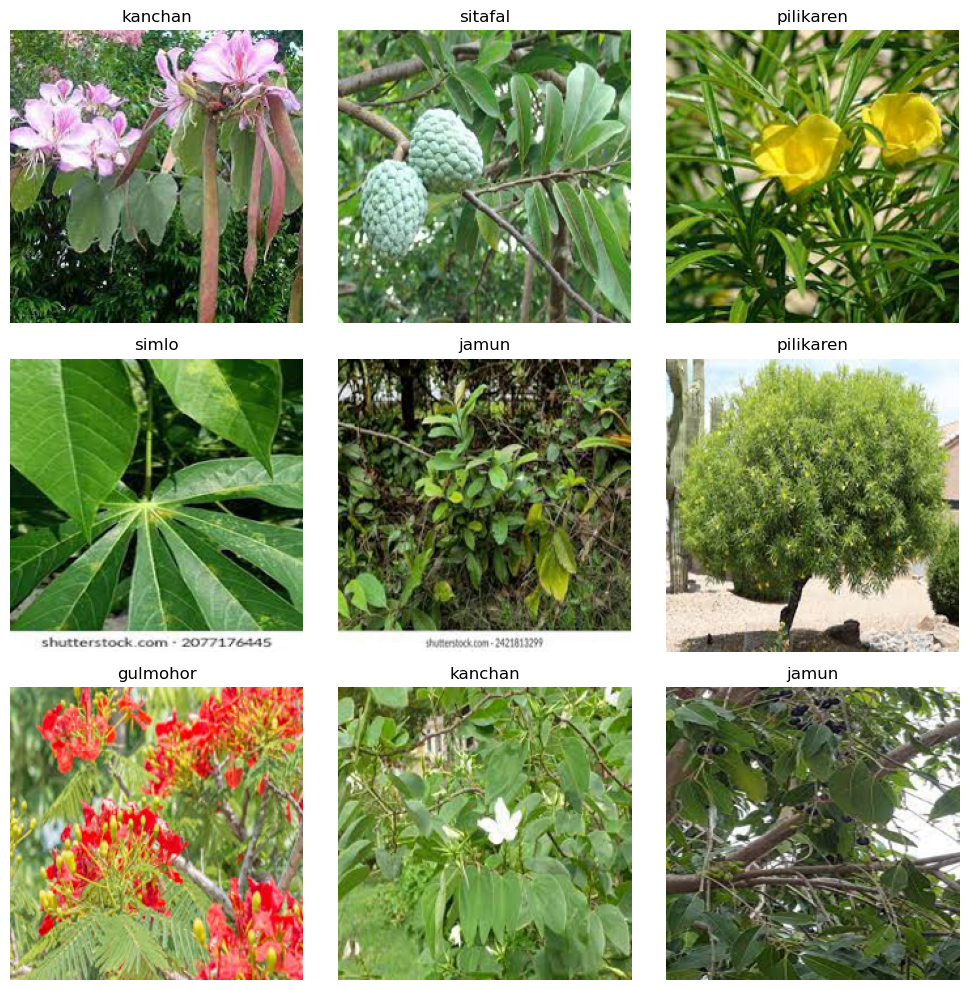

In [3]:
plt.figure(figsize=(10, 10))
for i in range(9):
    index = random.randint(0, len(image_paths) - 1)
    img = Image.open(image_paths[index]).resize((224, 224))

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(labels[index])
    plt.axis('off')

plt.tight_layout()
plt.show()


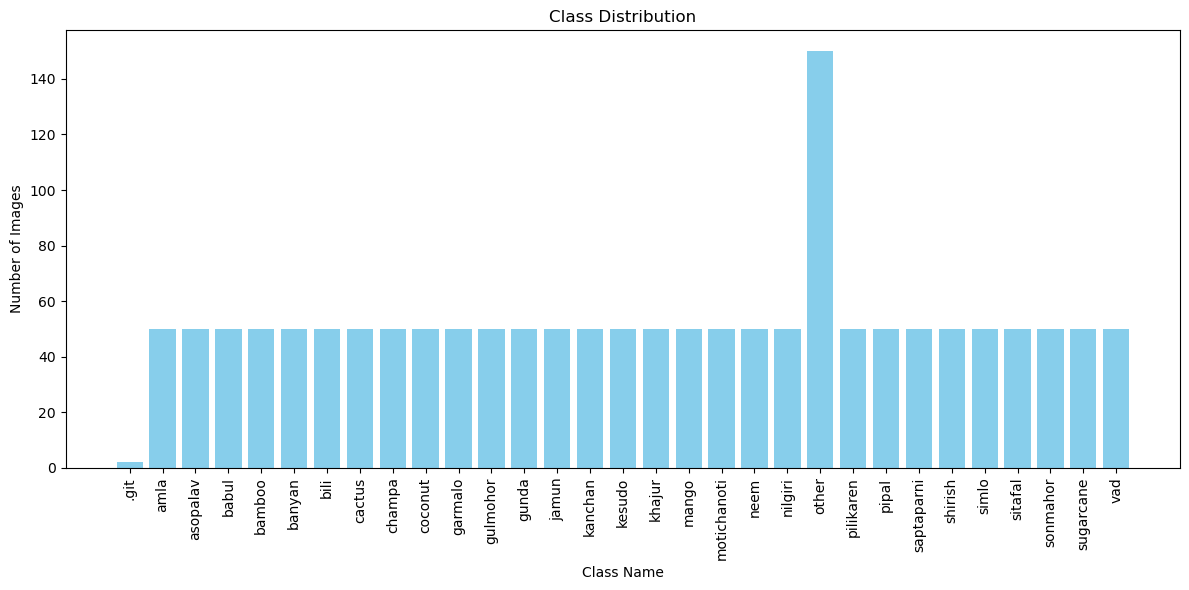

In [4]:
# Set the correct path to your unzipped dataset
data_path = r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset"  # <-- replace if your folder is named differently

# Count number of images in each class folder
class_counts = {cls: len(os.listdir(os.path.join(data_path, cls))) for cls in os.listdir(data_path)}

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Analyze Image Sizes

In [5]:
image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except:
            continue

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print(shapes_df.describe())


             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


# Check for Corrupted Images

In [7]:
corrupt_images = []

for class_dir in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_dir)
    if not os.path.isdir(class_path):
        continue

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        if img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            try:
                img = Image.open(img_path)
                img.verify()
            except Exception:
                corrupt_images.append(img_path)
                print(f"🧨 Corrupted: {img_path}")

print(f"✅ Finished checking. Corrupted images found: {len(corrupt_images)}")


✅ Finished checking. Corrupted images found: 0


# Detect and Remove Duplicates

In [8]:
hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except:
            continue

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print(f"🧩 Duplicate sets found: {len(duplicates)}")

# Remove all but one image in each duplicate set
removed_count = 0
for dup_list in duplicates.values():
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except:
            continue

print(f"✅ Removed {removed_count} duplicate images.")


🧩 Duplicate sets found: 82
✅ Removed 86 duplicate images.


# Detect Very Small or Very Large Images

In [9]:
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Flagging
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 20
🔺 Very large images: 40


# Visualize Flagged Images 

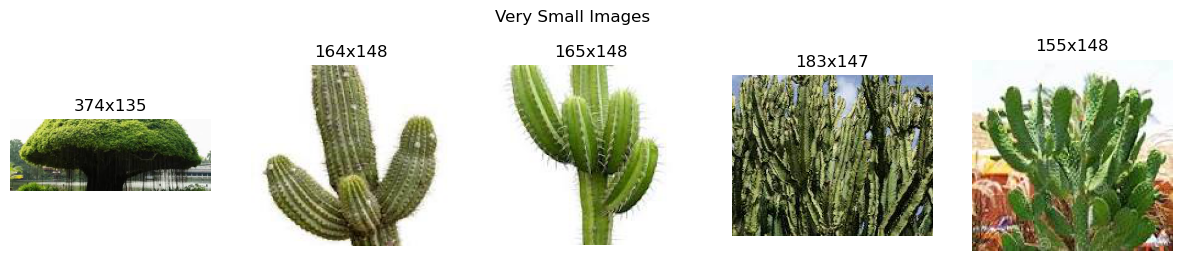

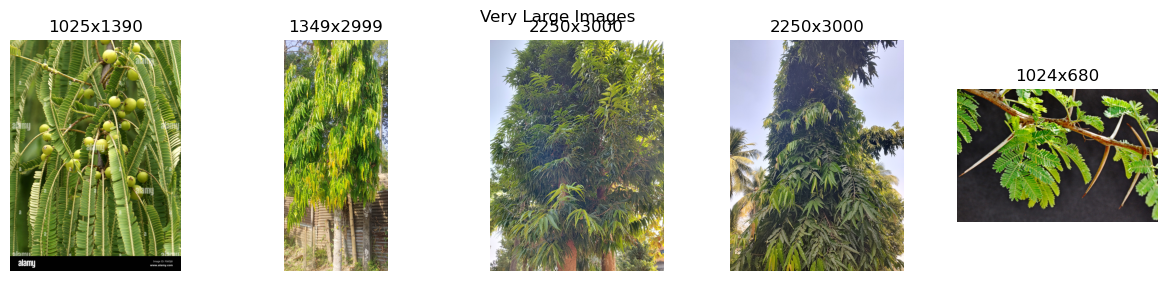

In [10]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        try:
            img = Image.open(row['path'])
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.title(f"{row['width']}x{row['height']}")
            plt.axis('off')
        except:
            continue
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


# Load Image Dataset (with 80-20 split)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)



Found 1220 images belonging to 31 classes.
Found 294 images belonging to 31 classes.


# Build the CNN Model
Training a deep convolutional neural network (CNN) like MobileNetV2 from scratch demands massive datasets, significant computational resources, and extensive model tuning—barriers that make custom deep learning difficult for most users. Transfer learning overcomes these challenges by leveraging MobileNetV2’s pretrained knowledge, which captures universal visual features such as edges, textures, and shapes from millions of images. This allows you to reuse powerful, general-purpose representations and simply train new output layers tailored to your specific problem—like classifying tree leaves—saving both time and resources while boosting performance with limited data.

In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


# Compile the Model

In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Train the Model

In [25]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25
)


Epoch 1/25
39/39 [==============================] - 35s 830ms/step - loss: 3.7038 - accuracy: 0.1213 - val_loss: 2.4640 - val_accuracy: 0.3197
Epoch 2/25
39/39 [==============================] - 33s 843ms/step - loss: 2.5242 - accuracy: 0.2984 - val_loss: 1.9971 - val_accuracy: 0.4864
Epoch 3/25
39/39 [==============================] - 34s 870ms/step - loss: 2.0643 - accuracy: 0.4057 - val_loss: 1.7480 - val_accuracy: 0.5306
Epoch 4/25
39/39 [==============================] - 35s 895ms/step - loss: 1.7371 - accuracy: 0.4943 - val_loss: 1.5959 - val_accuracy: 0.5680
Epoch 5/25
39/39 [==============================] - 35s 884ms/step - loss: 1.5798 - accuracy: 0.5369 - val_loss: 1.4998 - val_accuracy: 0.6020
Epoch 6/25
39/39 [==============================] - 35s 889ms/step - loss: 1.4128 - accuracy: 0.5598 - val_loss: 1.4287 - val_accuracy: 0.6497
Epoch 7/25
39/39 [==============================] - 35s 887ms/step - loss: 1.3038 - accuracy: 0.6172 - val_loss: 1.4158 - val_accuracy: 0.6429

# Fine-tune MobileNetV2(Optional)
In transfer learning, the standard practice is to initially freeze the base model, which means keeping its pretrained weights unchanged during the first phase of training. This base model, usually trained on massive datasets like ImageNet, has already learned to recognize general features such as edges and textures—knowledge that’s applicable to many tasks. By freezing these layers, you save computational resources, prevent overfitting (especially with smaller datasets), and enable your custom top layers to quickly adapt to your specific task. Once these new layers are trained, unfreezing some or all of the base model layers allows the network to fine-tune its feature extraction for your unique data, improving accuracy and the ability to handle differences in image style or conditions. The recommended workflow is to start with the base frozen, train the new layers, and then fine-tune the whole or partial base model with a smaller learning rate to achieve the best results.

# Plot Accuracy & Loss

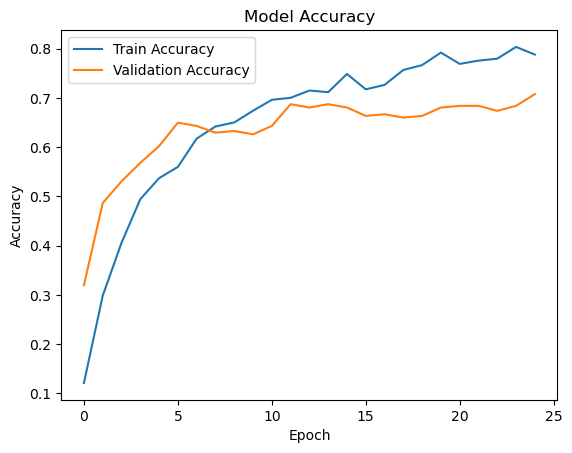

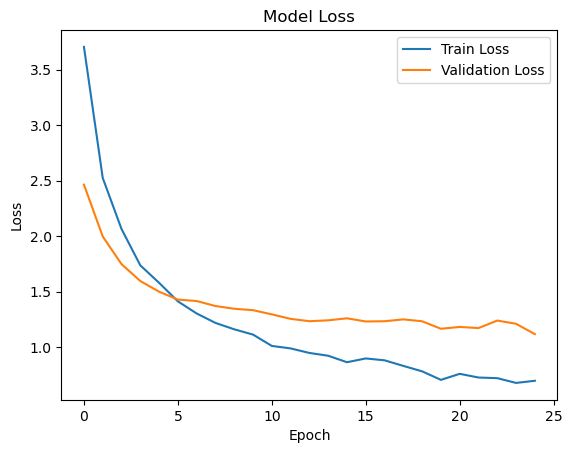

In [26]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Saving the Model

In [27]:
model.save("tree_species_mobilenetv2.h5")